# Model of the temperature sensor

Import the python model of LELO_TEMP

In [214]:
%load_ext autoreload
%autoreload 2
## Normal imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import re
import os   
import sys

sys.path.append("./py")
import LELO_TEMP 
import importlib
importlib.reload(LELO_TEMP)
lt=LELO_TEMP.LELO_TEMP()
print(lt.k_q)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
8.617333262145179e-05


Generate the estimate tables

In [215]:
T_kelvin = np.array([-40,25,125]) + lt.T0
current = lt.Current(T_kelvin)
vc = lt.Vc(T_kelvin)
deltaV = lt.DeltaV(T_kelvin)

print("|Temperature [C] | Current [uA] | Vc [V] | DeltaV [mV] |")
print("|----------------|--------------|--------|-----------------|")
for i in range(len(T_kelvin)):
    print(f"| {T_kelvin[i] - lt.T0:.0f} | {current[i] * 1e6:.3f} | {vc[i]:.4f} | {deltaV[i]*1e3:.1f} |")


#freq = lt.Freq(T_kelvin)

|Temperature [C] | Current [uA] | Vc [V] | DeltaV [mV] |
|----------------|--------------|--------|-----------------|
| -40 | 0.900 | 0.8386 | 83.6 |
| 25 | 1.133 | 0.7412 | 106.9 |
| 125 | 1.475 | 0.5844 | 142.7 |


In [216]:
T_kelvin = np.array([-40,25,125]) + lt.T0
freq = lt.Freq(T_kelvin)

print("|Temperature [C] | Frequency [MHz] |")
print("|----------------|-----------------|")
for i in range(len(T_kelvin)):
    print(f"| {T_kelvin[i] - lt.T0:.0f} | {freq[i] / 1e6:.3f} |")


|Temperature [C] | Frequency [MHz] |
|----------------|-----------------|
| -40 | 1.834 |
| 25 | 2.607 |
| 125 | 4.282 |


/Users/wulff/data/2023/aicex/ip/lelo_temp_sky130a/py/LELO_TEMP.py:160: RuntimeWarning: divide by zero encountered in log
  vc =  self.k_q*(T_kelvin)*(self.ell - 3*np.log(T_kelvin)) + self.VG
/Users/wulff/data/2023/aicex/ip/lelo_temp_sky130a/py/LELO_TEMP.py:160: RuntimeWarning: invalid value encountered in log
  vc =  self.k_q*(T_kelvin)*(self.ell - 3*np.log(T_kelvin)) + self.VG
/Users/wulff/data/2023/aicex/ip/lelo_temp_sky130a/py/LELO_TEMP.py:160: RuntimeWarning: invalid value encountered in multiply
  vc =  self.k_q*(T_kelvin)*(self.ell - 3*np.log(T_kelvin)) + self.VG


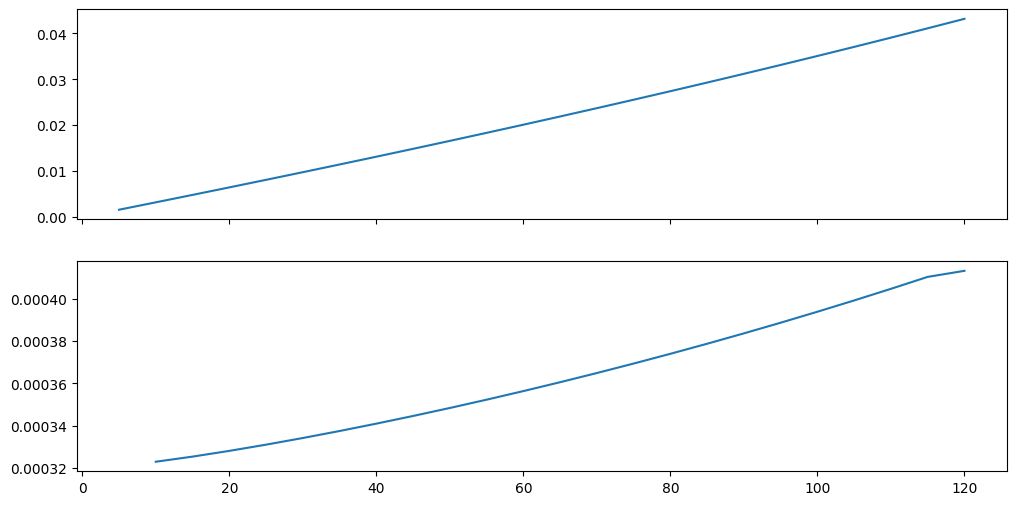

In [217]:
T = np.arange(-40,125,5)
deltav = lt.DeltaV(T)
vc = lt.Vc(T)

slope = deltav/vc
g_slope = np.gradient(slope,T)

fig,ax = plt.subplots(2,1,figsize=(12,6),sharex=True)
ax[0].plot(T,slope)
ax[1].plot(T,g_slope)
plt.show()


Plot the model versus expectation

[ 5.60396006e-01  5.36554362e-01  5.08755675e-01  4.75433908e-01
  4.30799340e-01  3.73519759e-01  2.96037101e-01  1.83252846e-01
 -2.75002896e-15 -3.58892492e-01 -1.41534843e+00 -2.24959470e+02
  2.82925984e+00  1.74260017e+00  1.39044183e+00  1.21461866e+00
  1.10504855e+00  1.02911718e+00  9.72591341e-01  9.28268923e-01
  8.92114567e-01  8.61691557e-01  8.35441547e-01  8.12321513e-01
  7.84187920e-01  7.59264262e-01  7.36858799e-01  7.16464911e-01
  6.97703066e-01  6.80283319e-01  6.63980361e-01  6.48616457e-01
  6.34049526e-01]


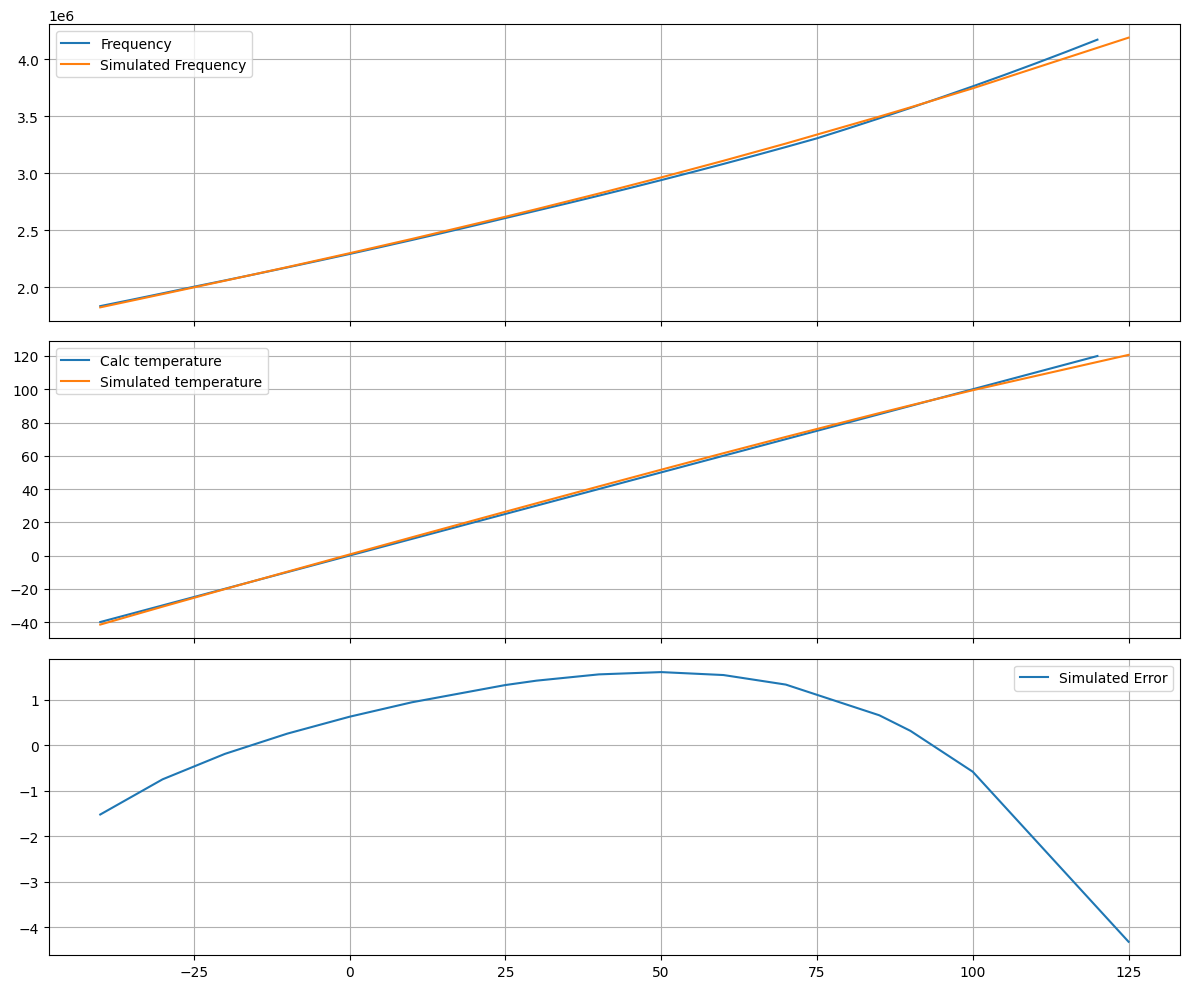

In [218]:
import yaml
x = np.arange(-40,125,5)

fname = "sim/LELO_TEMP/output_tran/tran_SchGtKttTtVt.yaml"
havesim = False
if(os.path.exists(fname)):
    havesim = True
    with open(fname) as fi:
        obj  = yaml.safe_load(fi)


    temp = np.array(obj["temperature"])
    freqsim = np.array(obj["freq"])


fig,ax = plt.subplots(3,1,figsize=(12,10),sharex=True)
#ax = [ax]
freq = lt.Freq(x + lt.T0)

ax[0].plot(x,freq,label="Frequency")

y1 = lt.KelvinFromFreq(freq,x + lt.T0) - lt.T0
y2 = lt.KelvinFromFreq(freq) - lt.T0

print(y1/y2)
ax[1].plot(x,y1,label="Calc temperature")
#ax[1].plot(x,y2,label="Calc temperature, no comp")
#ax[1].plot(x,x,label="Ideal")
#ax[2].plot(x,y2-x,label="Error, no comp")
if(havesim):
    ax[0].plot(temp,freqsim,label="Simulated Frequency")
    y = lt.KelvinFromFreq(freqsim,compensate=True) - lt.T0
    ax[1].plot(temp,y,label="Simulated temperature")
    ax[2].plot(temp,y-temp,label="Simulated Error")
for a in ax:
    a.grid()
    a.legend()

plt.tight_layout()
